# S1a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


In [ ]:
face = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_segment/hitchcock.png", cv2.IMREAD_GRAYSCALE)

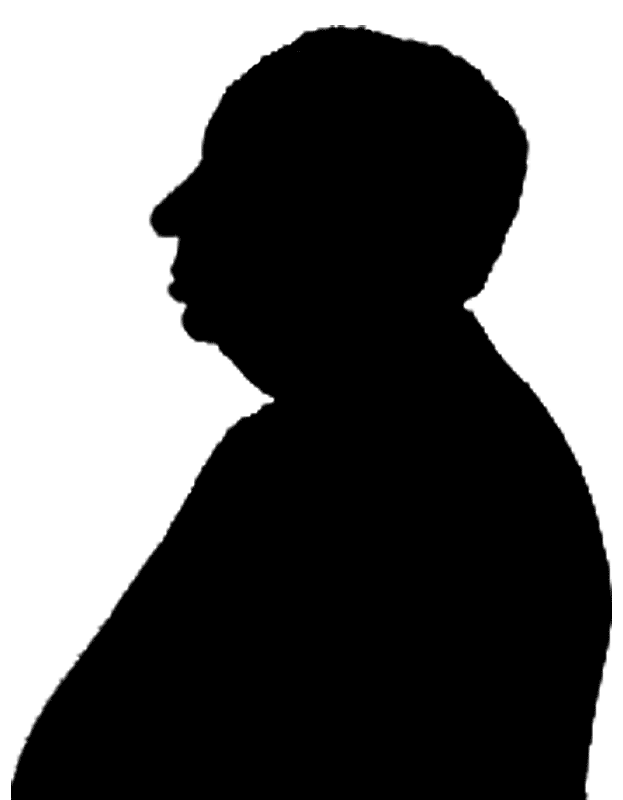

In [ ]:
cv2_imshow(face)

### Boundary extraction

In [ ]:
def calculateRange(i, index, tot):
  if (index < i) :
    #not enouth in the upper part
    step = i - index
    return range(-i+step, i+1)

  elif((tot-1)-index < i):
    #not enouth in the lower part
    step = i - (tot - (index + 1))
    return range(-i, i+1-step)

  else:
    #hole filter
    return range(-i, i+1)

In [ ]:
def erosion(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      minimum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel < minimum):
            #update the minimum
            minimum = pixel
      output_img[r][c] = minimum

  return output_img

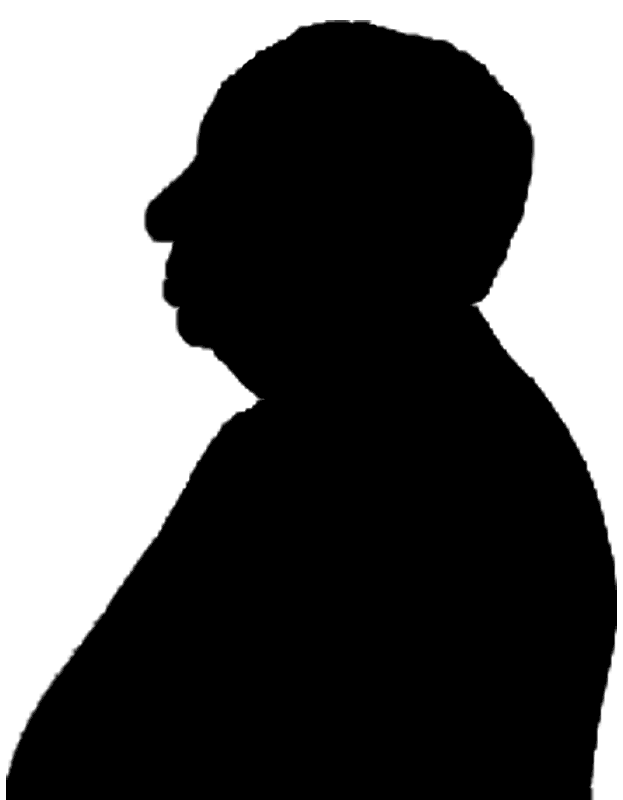

In [ ]:
erode_face = erosion(face, 5)
cv2_imshow(erode_face)

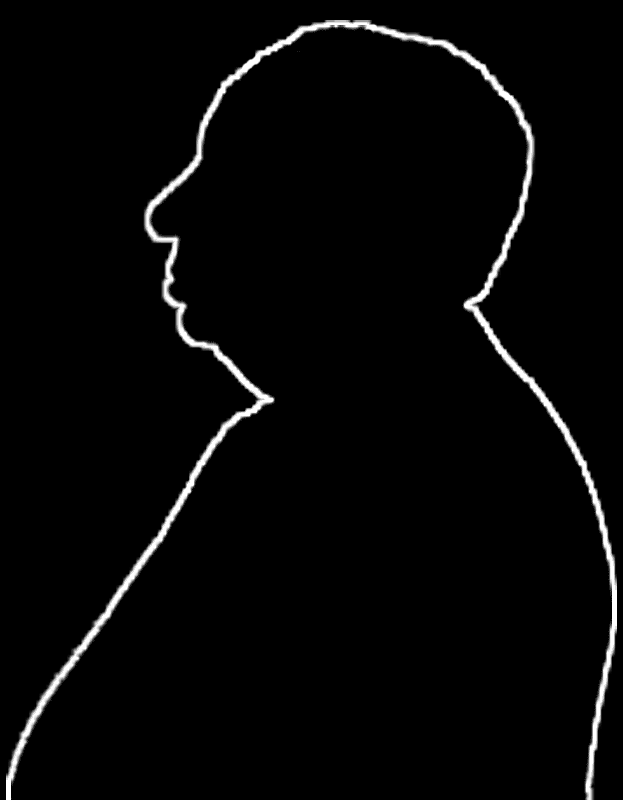

In [ ]:
boundary = face - erode_face
cv2_imshow(boundary)